In [3]:
import numpy as np

train_data=np.load('data.npy')
train_target=np.load('target.npy')
test_data=np.load('test_data.npy')
test_target=np.load('test_target.npy')


In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=train_data.shape[1:],kernel_initializer = 'orthogonal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),kernel_initializer = 'orthogonal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),kernel_initializer = 'orthogonal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 128)       1280      
                                                                 
 activation_3 (Activation)   (None, 62, 62, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 activation_4 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [12]:
from keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(rotation_range=15,zoom_range=0.12,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.12,horizontal_flip=True,fill_mode="nearest")


In [13]:
batchsize=32

history=model.fit(augmentation.flow(train_data,train_target,batch_size=batchsize),steps_per_epoch=len(train_data)//batchsize,
                  validation_data=(test_data,test_target),validation_steps=len(test_data)//batchsize,epochs=30)

Epoch 1/30
1742/1742 [==============================] - 447s 256ms/step - loss: 0.3922 - accuracy: 0.8235 - val_loss: 0.2060 - val_accuracy: 0.9239
Epoch 2/30
1742/1742 [==============================] - 349s 201ms/step - loss: 0.2615 - accuracy: 0.8950
Epoch 3/30
1742/1742 [==============================] - 345s 198ms/step - loss: 0.2215 - accuracy: 0.9136
Epoch 4/30
1742/1742 [==============================] - 344s 198ms/step - loss: 0.2000 - accuracy: 0.9228
Epoch 5/30
1742/1742 [==============================] - 344s 198ms/step - loss: 0.1900 - accuracy: 0.9282
Epoch 6/30
1742/1742 [==============================] - 344s 197ms/step - loss: 0.1801 - accuracy: 0.9304
Epoch 7/30
1742/1742 [==============================] - 345s 198ms/step - loss: 0.1703 - accuracy: 0.9355
Epoch 8/30
1742/1742 [==============================] - 343s 197ms/step - loss: 0.1656 - accuracy: 0.9374
Epoch 9/30
1742/1742 [==============================] - 344s 197ms/step - loss: 0.1571 - accuracy: 0.9413
Epoc

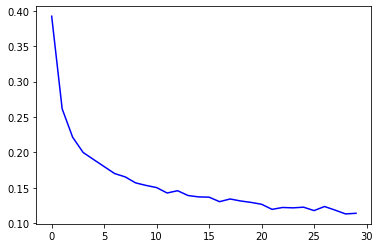

In [14]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'],'b')
plt.plot(model.history.history['val_loss'],'r')




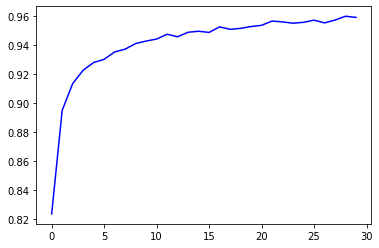

In [15]:
plt.plot(model.history.history['accuracy'],'b')
plt.plot(model.history.history['val_accuracy'],'r')

In [16]:
model.save_weights(r'TEST1.h5')

In [18]:
print(model.evaluate(test_data,test_target))
predicted_target=model.predict(test_data)


1743/1743 [==============================] - 97s 56ms/step - loss: 0.0644 - accuracy: 0.9765
[0.06435137987136841, 0.9764689207077026]
1743/1743 [==============================] - 95s 54ms/step
